# DSC 550 - Data Mining
# Week 5 Exercise: Build your own Setiment Analysis Model

## Prepare the Data for the Custom Model

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np
#import textblob to perform sentiment analysis
from textblob import TextBlob
#import accuracy calculator from sklearn
from sklearn.metrics import accuracy_score
#import nltk library
import nltk
#get the vader sentiment analyzer from the nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#import the data
df_reviews = pd.read_csv('labeledTrainData.tsv', sep='\t')
#get the dimensions of the data
print(df_reviews.shape)
#view the data
df_reviews.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
#import regular expressions library
import re

#import nltk
import nltk
#import stopwords from NLTK
from nltk.corpus import stopwords
#import word tokenizer from NLTK
from nltk.tokenize import word_tokenize

#import sklearn
import sklearn
#import word count vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
#import tf-idf vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#get a data frame with reviews and sentiments only
df_reviews_preprocessed = pd.DataFrame(df_reviews[['sentiment','review']])
df_reviews_preprocessed.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
#Convert text to lowercase and romove punctuation/special characters
#define a function to clean the text
def clean_text(text):
    """
    Remove punctuations and special characters, makes lower case
    Args: text 
    Output: text
    """    
    text=text.lower() #makes text lowercase
    text=re.sub('\\d|\\W+|_',' ',text) #removes extra white space
    text=re.sub('[^a-zA-Z0-9]'," ", text) #removes any non-alphanumeric characters
    
    return text

In [6]:
#Remove stop words (and tokenize)
def tokenize_and_remove_stop_words(txt):
    """
    takes in a sentence, tokenizes the words into a list,
    and then removes stop words from the tokenized list
    """
    #import the nltk package for tokenizing and removing stop words
    import nltk
    from nltk.tokenize import word_tokenize
    #Note: You may have to run this next commmand to download the NLTK 'punkt' library for the first time
    #nltk.download('punkt')
    from nltk.corpus import stopwords
    #Note: You may need to run this next command to download stopwords for the first time
    #nltk.download('stopwords')
    stop_words = stopwords.words('english')
    
    txt_token = word_tokenize(txt)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    
    return txt_no_stopwords

In [7]:
#Apply NLTK's PorterStemmer
#define a function to stem the words
def stem_text(word_list):
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    
    return [porter.stem(word) for word in word_list]

In [ ]:
#create new columns in the data frame for each preprocessing step
#apply text cleaning function
df_reviews_preprocessed['review_clean'] = df_reviews_preprocessed['review'].apply(clean_text)
#aplpy tokenizing/removing stop words function
df_reviews_preprocessed['review_tokenized'] = df_reviews_preprocessed['review_clean'].apply(tokenize_and_remove_stop_words)
#apply PorterStemmer function
df_reviews_preprocessed['review_stemmed'] = df_reviews_preprocessed['review_tokenized'].apply(stem_text)
#put the text back together (untokenize)
df_reviews_preprocessed['review_final'] = df_reviews_preprocessed['review_stemmed'].apply(lambda text: ' '.join(text))

In [9]:
#view the pre-processed text
print(df_reviews_preprocessed.shape)
df_reviews_preprocessed.head()

(25000, 6)


,sentiment,review,review_clean,review_tokenized,review_stemmed,review_final
0,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ...",stuff go moment mj start listen music watch od...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi...",superbl trashi wondrous unpretenti exploit hoo...


In [10]:
#import library to create train/test split
from sklearn.model_selection import train_test_split

In [11]:
#define test percentage
test_perc = 0.2
text_train, text_test, y_train, y_test = train_test_split(df_reviews_preprocessed['review_final'], 
                                                           df_reviews_preprocessed['sentiment'], 
                                                           test_size = test_perc)
print('Number of Samples in Training Set:', len(text_train))
print('Number of Samples in Test Set:', len(text_test))

Number of Samples in Training Set: 20000
Number of Samples in Test Set: 5000


In [12]:
#define a function to get the tf-idf vectorization
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(text_train)
X_test = tfidf.transform(text_test)
#check the shape of the tfidf vectors
print('Shape of TFIDF Training Matrix:', X_train.shape)
print('Shape of TFIDF Test Matrix:', X_test.shape)

Shape of TFIDF Training Matrix: (20000, 45320)
Shape of TFIDF Test Matrix: (5000, 45320)


## Train the Logistic Regression Model

In [13]:
#import logistic regression logistic regression model
from sklearn.linear_model import LogisticRegression 

In [14]:
#initialize the model
log_reg_mod = LogisticRegression()
#train the model
log_reg_mod.fit(X_train, y_train)

LogisticRegression()

In [15]:
#get the model predictions on the test set
predictions = log_reg_mod.predict(X_test)

In [16]:
#import metric evaluation tools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Model Accuracy: 0.8874

Confusion Matrix


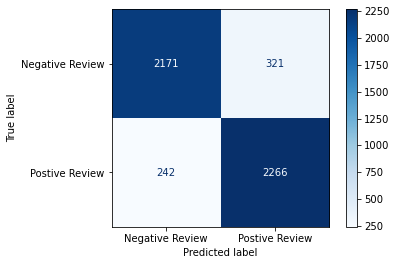


Classification Report

                 precision    recall  f1-score   support

Negative Review       0.90      0.87      0.89      2492
 Postive Review       0.88      0.90      0.89      2508

       accuracy                           0.89      5000
      macro avg       0.89      0.89      0.89      5000
   weighted avg       0.89      0.89      0.89      5000



In [17]:
class_names = ['Negative Review', 'Postive Review']
print('Model Accuracy:', accuracy_score(y_test, predictions))
print('\nConfusion Matrix')
plot_confusion_matrix(log_reg_mod, X_test, y_test, cmap = plt.cm.Blues, display_labels = class_names) 
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, predictions, target_names = class_names))

In [18]:
#import ROCAUC from yellowbrick to get the ROC curve
from yellowbrick import ROCAUC

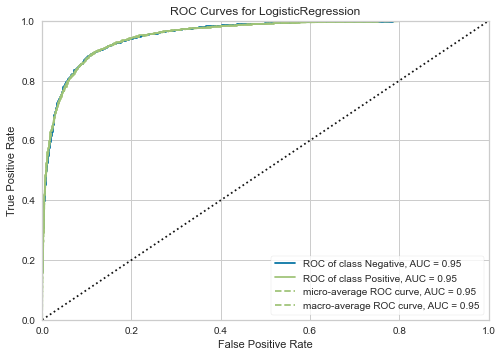

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
label_encoder = {0: 'Negative', 1: 'Positive'}
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(log_reg_mod, encoder = label_encoder)

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test) 
roc_curve.show()